In [1]:
!pip install opencv-contrib-python

In [2]:
import cv2 as cv


cv.imread -> to read image

cv.imshow -> to show the image

capture = cv.VideoCapture()
//video read in the form of frame so

isTure , frame = capture.read()
// isTrure tell the video frame is read correct or not

capture.release()
cv.destoryAllWindows()

cv2.waitKey(0): Wait indefinitely for a key press.Key press any time

cv2.waitKey(20): Wait for 20 milliseconds for a key press (commonly used in video loops). If key press in 20s then run if else continue to next iteration

0xFF == ord('d'): Checks if the key pressed corresponds to the letter 'd' (used for keyboard event handling in OpenCV).




## **RESCALE IMAGE**

frame.shape[0]  // height

frame.shape[1]  // width

frame.shape[0] * scale=0.75

frame.shape[1] * scale=0.75


# **RESIZE IMAGE**

cv.resize(frame , framedimension)

/// THIS set work for the live video

capture.set()
eg:
capture.set(3,width) //3 is an identifier for setting the frame width

capture.set(4,height)

resized_image = cv2.resize(src, dsize, fx=0, fy=0, interpolation=cv2.INTER_LINEAR)

src: The source image (the image you want to resize).

dsize: The desired size for the output image, provided as (width, height). If you specify this, the scaling factors (fx, fy) are ignored.

fx: The scale factor for the horizontal (x-axis) dimension. It's optional and used when dsize is not specified.

fy: The scale factor for the vertical (y-axis) dimension. It's optional and used when dsize is not specified.

interpolation: The interpolation method used for resizing. Common options include:

cv2.INTER_LINEAR (default): Bilinear interpolation, which is fast and works well for most cases.

cv2.INTER_NEAREST: Nearest-neighbor interpolation, fastest but may cause blocky results.

cv2.INTER_AREA: For shrinking images (reducing size), often provides better results.

cv2.INTER_CUBIC: Bicubic interpolation, which provides smoother results but is slower.

cv2.INTER_LANCZOS4: High-quality downsampling, good for reducing images with a high level of deta

In [4]:
import numpy as np

In [3]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow instead of cv2.imshow

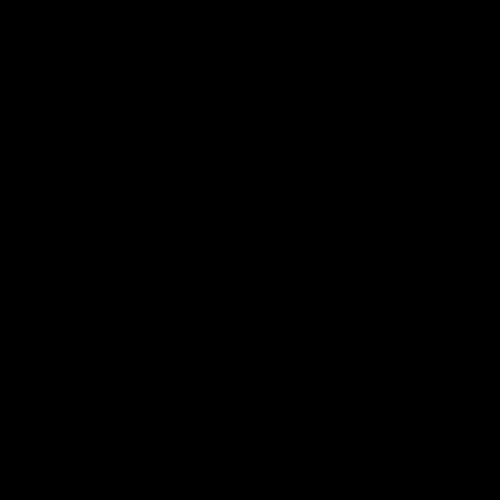

In [13]:
blank = np.zeros((500,500,3) , dtype='uint8')
cv2_imshow(blank)

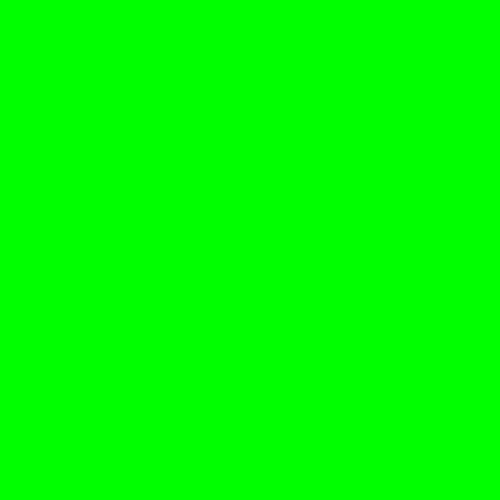

In [14]:
blank[:] = 0,255,0;
cv2_imshow(blank)

cv2.rectangle(image, pt1, pt2, color, thickness)
cv2.circle()
cv2.line()

cv.putText(img, text, org, fontFace, fontScale, color, thickness)


# **CONVERTING TO A GRAY SKILL**

# Step 2: Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**BLUR**
cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None)

**EDGE**
cv.cannny use to detect the edges

**EDGE THINK**
cv2.dilate() is used to thicken the edges by expanding

**ERPDE** cv2.erode() is used to erode (shrink or thin) the white regions in a binary image or reduce the size of foreground objects. It is the opposite of dilation. Erosion is used to reduce noise or detach objects that are connected.
-> Back the image from thick to clear or remove noisy

In [1]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow instead of cv2.imshow

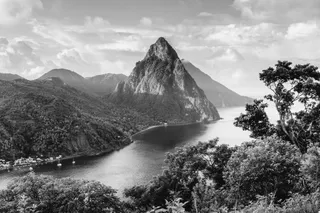

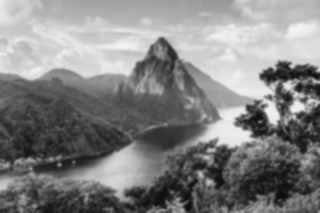

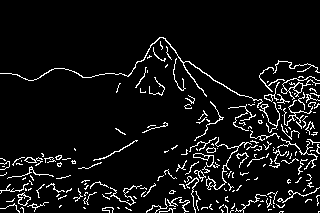

-1

In [9]:
img = cv.imread('/content/place.webp')

# Convert the image to grayscale (Canny edge detection works on single channel images)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow( gray)
# Apply Gaussian blur to reduce noise
blur = cv.GaussianBlur(gray, (5, 5), 0)
cv2_imshow( blur)
# Perform Canny edge detection
canny = cv.Canny(blur, 125, 175)
cv2_imshow( canny)

cv.waitKey(0)

## **TRANSLATION**
+x -> traslate on right

-x -> traslate on left

+y -> traslate on down

-y -> traslate on up


In [ ]:
# Define translation parameters (shift by 100 pixels to the right and 50 pixels down)
tx = 100  # Shift along x-axis
ty = 50   # Shift along y-axis

# Get the translation matrix
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply the translation using warpAffine
translated_img = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))

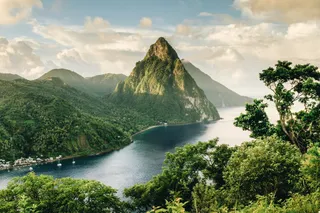

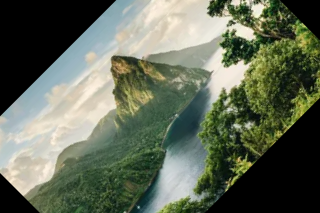

In [7]:
import cv2 as cv
import numpy as np

# Load the image
img = cv.imread('place.webp')

# Get the dimensions of the image
(h, w) = img.shape[:2]

# Define the center of the image (where the rotation will happen)
center = (w // 2, h // 2)

# Get the rotation matrix for a 45-degree rotation
rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0)  # 1.0 means no scaling

# Apply the rotation using warpAffine
rotated_img = cv.warpAffine(img, rotation_matrix, (w, h))

# Show the original and rotated image
cv2_imshow( img)
cv2_imshow(rotated_img)

cv.waitKey(0)
cv.destroyAllWindows()


**## FLIP**

cv2.flip(image, flipCode)

flipCode = 0: Flips the image vertically (along the x-axis).

flipCode > 0 (typically 1): Flips the image horizontally (along the y-axis).

flipCode < 0 (typically -1): Flips the image both horizontally and vertically (flips around

## **Thresholding**

Thresholding is a technique in image processing that converts a grayscale image into a binary image (black and white).

Grayscale Image: Each pixel has an intensity value between 0 and 255 (for 8-bit images).
Binary Image: After thresholding, each pixel is either 0 (black) or 255 (white).

If a pixel value is above the threshold, it gets set to 255 (white).
If a pixel value is below the threshold, it gets set to 0 (black).


**ret, thresh = cv2.threshold(image, thresh_value, max_value, threshold_type)**

------------- ret is the tresh value

image: Grayscale image you want to threshold.
thresh_value: The threshold value you set.
max_value: The maximum value to assign to pixels that meet the condition.
threshold_type: The type of thresholding (e.g., binary, inverse, truncation).

### **Contours**

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Contours are a way to represent the shape of objects in an image.

They are often used to detect object boundaries and extract object features

**cv2.RETR_TREE:**

cv2.RETR_EXTERNAL: Retrieves only the outermost contours, ignoring child contours.
cv2.RETR_LIST: Retrieves all contours without establishing any hierarchical relationship.
cv2.RETR_CCOMP: Retrieves all the contours and arranges them into a two-level hierarchy.

**cv2.CHAIN_APPROX_SIMPLE:**

 This method compresses horizontal, vertical, and diagonal segments and leaves only their endpoints. This reduces the number of points stored, thus saving memory.

 cv2.CHAIN_APPROX_NONE: Stores all contour points, no compression is done.

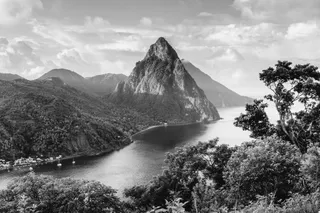

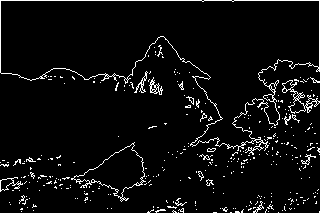

In [5]:
img = cv.imread('place.webp')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# also we use a canny to develop coutours or binary as below
ret , binary_img = cv.threshold(img, 150, 255, cv.THRESH_BINARY)

contours , hierarchy= cv.findContours(binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

blank = np.zeros(img.shape[:2], dtype='uint8')

cv.drawContours(blank, contours, -1, 255, 1)

cv2_imshow(img)
cv2_imshow(blank)

cv.waitKey(0)
cv.destroyAllWindows()




*  OPENCV USE BGR FORMAT
*  gray skill image has a shape = 1




----cv.split()

----cv.merge()

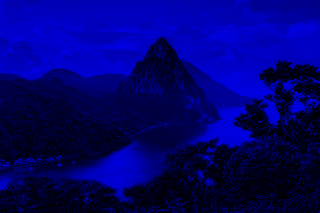

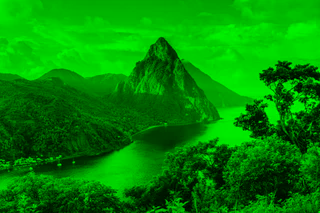

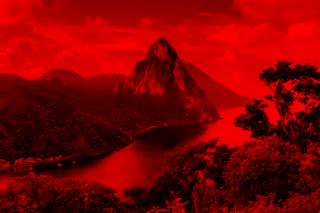

In [17]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image
img = cv.imread('place.webp')

# Create a blank image with the same dimensions as the original image
blank = np.zeros(img.shape[:2], dtype='uint8')

# Split the image into its blue, green, and red channels
b, g, r = cv.split(img)

# Create images highlighting each channel
blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])

# Display the results
cv2_imshow(blue)   # Only blue channel visible
cv2_imshow(green)  # Only green channel visible
cv2_imshow(red)    # Only red channel visible


**Averaging (Mean Blur)**

blurred = cv2.blur(img, (k, k))  # k is the size of the kernel

**Gaussian Blur**

 blurred = cv2.GaussianBlur(img, (k, k), sigmaX)

**Median Blur**
blurred = cv2.medianBlur(img, 5)  # 5x5 kernel



Bitwise Operations
cv2.bitwise_and(): Computes the bitwise AND of two arrays (images). It is often used for masking operations.

cv2.bitwise_or(): Computes the bitwise OR of two arrays. It is used to combine regions of two images.

cv2.bitwise_xor(): Computes the bitwise XOR of two arrays. It shows the non-overlapping parts between two images.

cv2.bitwise_not(): Computes the bitwise NOT of an array (image). It inverts the image.

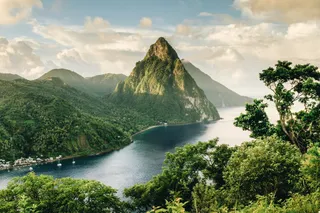

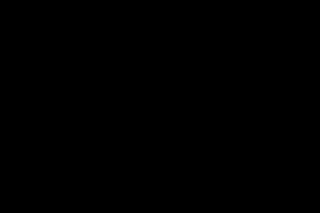

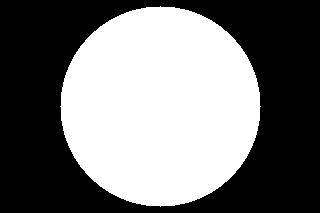

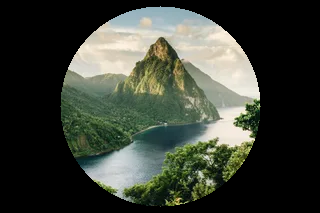

-1

In [8]:
img = cv.imread('place.webp')
cv2_imshow(img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv2_imshow( blank)

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv2_imshow(mask)

masked = cv.bitwise_and(img, img, mask=mask)
cv2_imshow( masked)

cv.waitKey(0)


## **Grayscale Histogram**

0 represents black (lowest intensity),
255 represents white (highest intensity)

The x-axis of the histogram represents intensity values (0–255).

The y-axis represents the frequency or count of pixels for each intensity level.

[img]: The source image, provided as a list.

[0]: The channel to compute the histogram for (0 represents the grayscale channel).

None: No mask is applied (we want the histogram for the whole image).

[256]: The number of bins (one for each intensity value from 0 to 255).

[0, 256]: The intensity range (0 to 256) to include in the histogram.

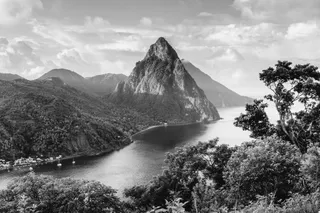

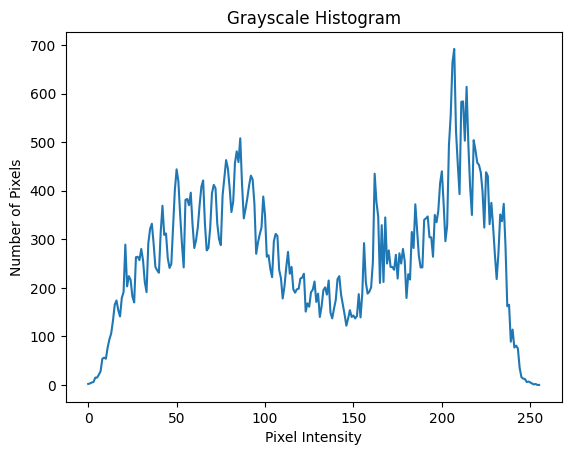

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load a grayscale image
img = cv.imread('place.webp', cv.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Calculate the histogram
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()


**Simple Thresholding**

ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

Works best for uniform lighting

**Adaptive Thresholding**

Works well for images with varying illuminatio

ADAPTIVE_THRESH_MEAN_C, ADAPTIVE_THRESH_GAUSSIAN_C

adaptive_thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

img: The input grayscale image.
255: The maximum value to assign to pixels that meet the threshold condition.
cv.ADAPTIVE_THRESH_MEAN_C: The adaptive thresholding algorithm. This method uses the mean of the neighborhood pixel values to determine the threshold.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: Another adaptive method that uses the weighted sum of the neighborhood pixel values (using a Gaussian window).
cv.THRESH_BINARY: Type of thresholding to apply.
11: Block size, i.e., the size of the neighborhood used for calculating the threshold.
2: Constant that is subtracted from the mean or weighted sum to fine-tune the threshold.

**Edge Detection Method	Description	Pros	Cons**

**Laplacian	Detects** edges based on the second derivative

Simple and fast

Sensitive to noise; may detect false edges

**Canny** Multi-stage edge detection algorithm

Accurate and robust to noise	More computationally expensive

**Sobel**	Detects edges based on the first derivative in X/Y

Can detect edges in specific directions

less noise-sensitive	Less accurate than Canny; detects edges only in X and Y axes


**Steps for Haar Cascade Object Detection:**

1. Load the Pre-trained Classifier: OpenCV provides many pre-trained Haar Cascade models, such as haarcascade_frontalface_default.xml for face detection, haarcascade_eye.xml for eye detection, and others for smile, license plates, etc.

2. Convert Image to Grayscale: Haar cascades work on grayscale images, so you need to convert your image to grayscale first.

3. Detect Objects: The classifier is applied to the image, and it returns the coordinates of any detected objects (e.g., faces, eyes).

4. Draw Bounding Boxes: The coordinates of detected objects are used to draw rectangles around them for visualization.

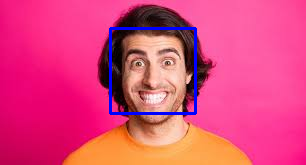

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained classifier for face detection
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
img = cv.imread('person.jpeg')

# Convert the image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()


scaleFactor: Specifies how much the image size is reduced at each image scale. A scaleFactor of 1.1 means the image size is reduced by 10% at each scale, helping detect objects of different sizes.

minNeighbors in Haar Cascade sets the minimum number of overlapping detection rectangles needed to confirm an object. Higher values increase accuracy by reducing false positives but may miss some objects.